In [1]:
# Importing timportant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\IQRA SHAIKH\OneDrive\Documents\GitHub\coffee Sales analysis\projectfiles\index.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [3]:
df.tail()

,date,datetime,cash_type,card,money,coffee_name
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte
1132,2024-07-31,2024-07-31 21:55:16.570,card,ANON-0000-0000-0446,32.82,Latte


In [4]:
df.shape

(1133, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [6]:
df.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [7]:
df.corr()

ValueError: could not convert string to float: '2024-03-01'

In [7]:
df['cash_type'].unique()

array(['card', 'cash'], dtype=object)

In [8]:
df.isna().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

<Axes: >

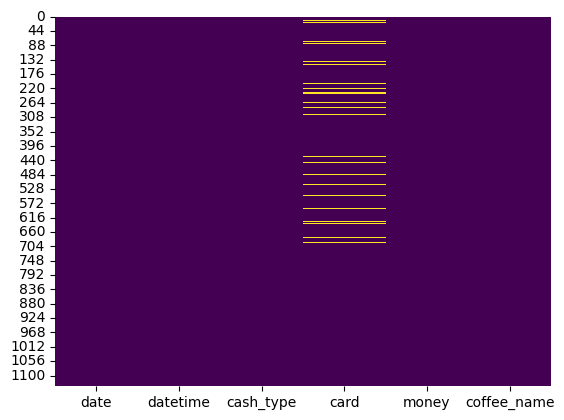

In [9]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')

In [10]:
# Converting dates
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

In [11]:
# Create time features
df['month'] = df['date'].dt.to_period('M')
df['day'] = df['date'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

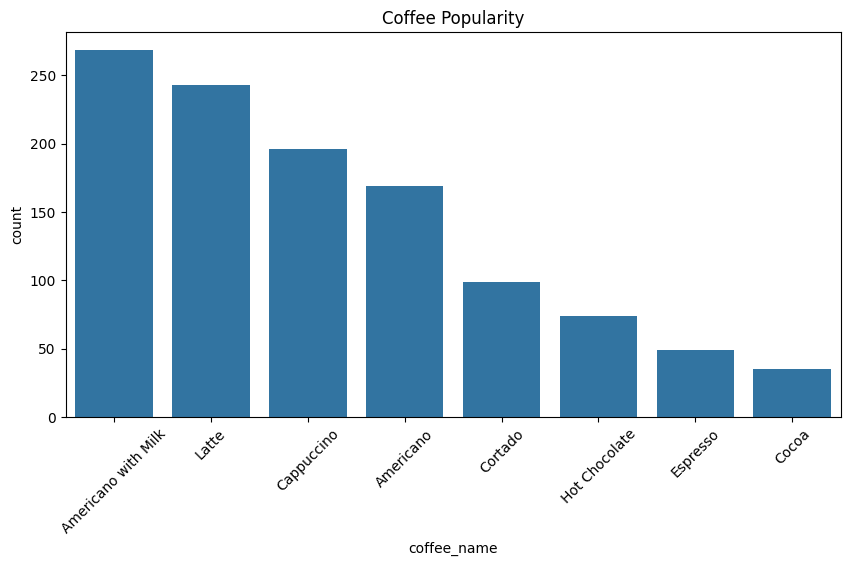

In [12]:
# Coffee popularity
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Coffee Popularity")
plt.show()


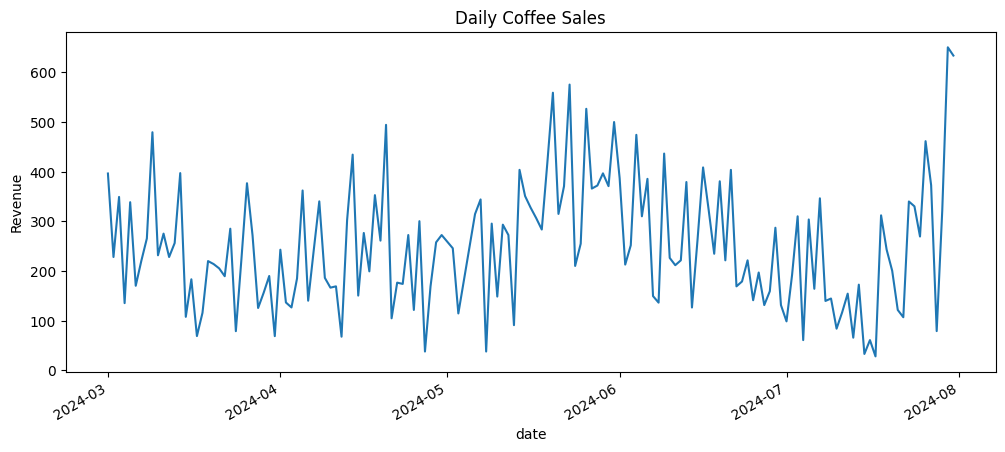

In [13]:
# Sales over time
daily_sales = df.groupby('date')['money'].sum()
plt.figure(figsize=(12,5))
daily_sales.plot()
plt.title("Daily Coffee Sales")
plt.ylabel("Revenue")
plt.show()


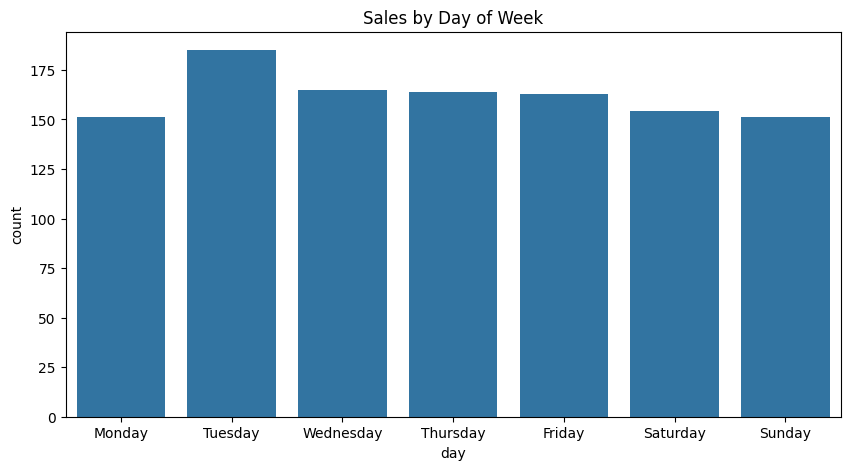

In [14]:
# Weekly trends
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='day', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Sales by Day of Week")
plt.show()

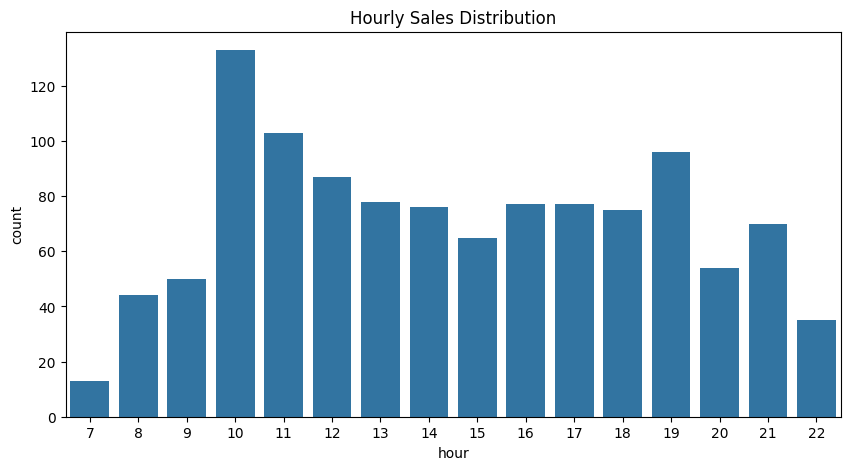

In [15]:
# Hourly trends
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='hour')
plt.title("Hourly Sales Distribution")
plt.show()

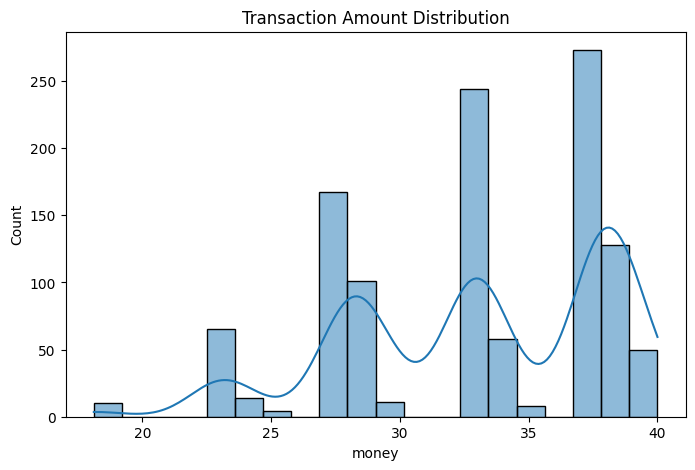

In [16]:
# Basic sales distribution
plt.figure(figsize=(8,5))
sns.histplot(df['money'], bins=20, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

In [17]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,Friday,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,Friday,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,Friday,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03,Friday,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03,Friday,13


In [18]:
df.drop(['card','date','cash_type'], axis=1, inplace=True)

In [19]:
df.head()

,datetime,money,coffee_name,month,day,hour
0,2024-03-01 10:15:50.520,38.7,Latte,2024-03,Friday,10
1,2024-03-01 12:19:22.539,38.7,Hot Chocolate,2024-03,Friday,12
2,2024-03-01 12:20:18.089,38.7,Hot Chocolate,2024-03,Friday,12
3,2024-03-01 13:46:33.006,28.9,Americano,2024-03,Friday,13
4,2024-03-01 13:48:14.626,38.7,Latte,2024-03,Friday,13


In [20]:
df['coffee_name'].unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

In [21]:
unique_prices = df.groupby("coffee_name")["money"].unique().reset_index()
print(unique_prices)


           coffee_name                             money
0            Americano  [28.9, 30.0, 27.92, 29.0, 23.02]
1  Americano with Milk  [33.8, 35.0, 32.82, 34.0, 27.92]
2           Cappuccino  [38.7, 40.0, 37.72, 39.0, 32.82]
3                Cocoa  [38.7, 40.0, 39.0, 37.72, 32.82]
4              Cortado        [28.9, 30.0, 27.92, 23.02]
5             Espresso        [24.0, 25.0, 23.02, 18.12]
6        Hot Chocolate  [38.7, 40.0, 37.72, 39.0, 32.82]
7                Latte  [38.7, 40.0, 37.72, 39.0, 32.82]


In [22]:
# doing label encoding for coffee name column
!pip install scikit-learn

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['coffee_name'] = le.fit_transform(df['coffee_name'])


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
